<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/Semantic_Image_Segmentation_with_Deep_Convolutional_Nets_and_Fully_Connected_CRFs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Semantic Image Segmentation with Deep Convolutional Nets and Fully Connected CRFs**

논문 링크: https://arxiv.org/abs/1412.7062

CNN은 image classification이나 object detection과 같은 Vision task에서 좋은 성능을 보여줬다.

하지만, semantic segmentation과 같이 pixel 단위로 classification하는 경우는 조밀한 예측이 필요한데, classification model을 기반으로 segmentation을 진행하면 feature-map의 크기가 줄어들기 때문에 detail한 정보를 얻기 힘들다.

따라서 본 논문에서는 이전 방식보다 훨씬 간단하며 효율적으로 조밀한 계산을 할 수 있는 hole algorithm를 이용한 DeepLab v1을 제안한다.

## **DeepLab v1 구조**

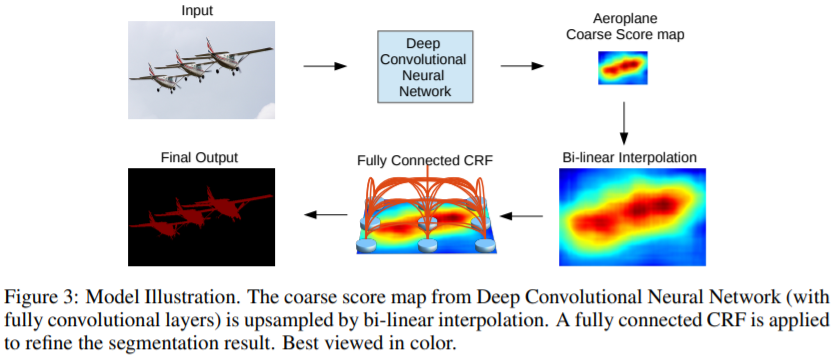

위의 그림 Figure 3이 바로 Deeplab v1의 전체적인 구조이다.

DeepLab은 **기본적으로 VGG-16을 기반으로 hole algorithm과 CRF를 추가한 것**이다. 따라서 hole algorithm과 CRF를 알아보겠다. 먼저, 핵심이 되는 hole algorithm에 대해 알아보겠다. (참고로, DeepLab v2부턴 hole algorithm을 atrous convolution으로 바꿔 부른다.)

### **Hole Algorithm**

앞서 잠깐 언급했듯이 classification이나 detection은 보통 대상의 존재 여부에 집중하기 때문에 detail한 부분보단 global한 부분에 집중을 한다.

반면, semantic segmentation은 pixel 단위의 조밀한 예측이 필요하다.

FCN에서는 skip layer를 활용해 원본 size의 1 / 8, 1 / 16, 1 / 32 resolutiom을 가지고 있는 결과를 concat하여 detail이 줄어드는 문제를 보강했으나, 여전히 receptive field가 충분히 크지 않아 detail한 부분을 살릴 수 없다.

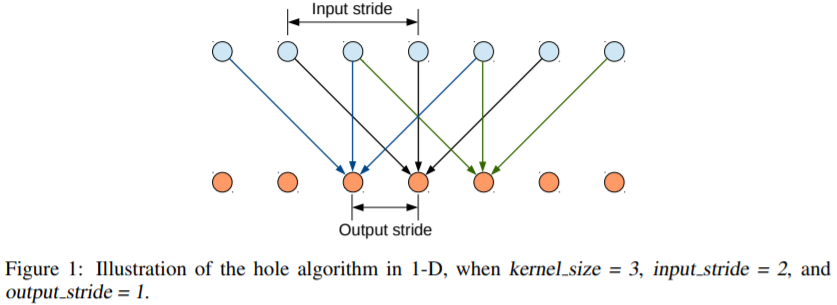

위의 그림 Figure 1이 본 논문에 나와있는 hole algorithm인데,

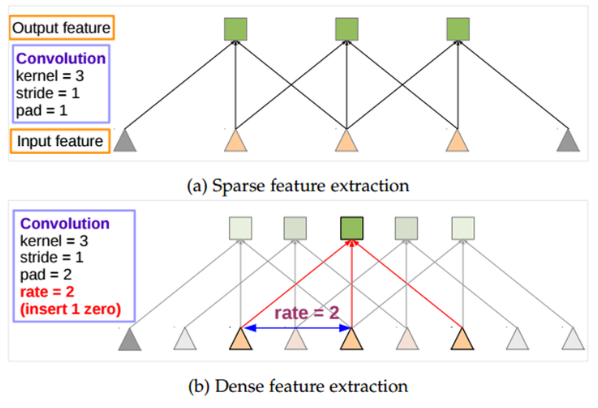

좀 더 쉬운 설명을 위해 직관적으로 기본 convolution과 비교를 해보겠다. 위에서 (a)가 일반적인 convolution이고 kernel size가 3인 convolution이다. (b)는 확장 계수가 2인 경우로 인접한 data가 아닌 중간에 hole이 1개씩 들어오는 점이 (a)와 다르며, 같은 kernel size가 3이더라도 영역의 크기가 커진 것을 알 수 있다.

### **Fully Connected CRF**

hole algorithm을 사용하여도 후처리가 깔끔하지 않다는 한계점이 존재한다. 따라서 본 논문의 저자는 bi-near interpolation을 통해 GT와 같은 size를 가진 output을 CRF를 통해 후처리를 함으로써 pixel 단위의 예측의 정확도를 높였다.

일반적으로 short-range(좁은 범위의) CRF는 segmentation을 수행한 뒤 생기는 segmentation noise를 없애는 용도로 많이 사용이 된다.

그러나, DCNN에서는 여러 단계의 conv + pooling을 거치기 때문에 feature map의 크기가 작아지게 되고 이를 upsampling을 통해 GT size로 확대하기엔 이미 충분히 smoothen되어 있는 상태이며 여기에 short-range CRF(noise를 제거하는 용도)를 사용하면 결과가 더 빠진다. 왜냐하면 당연히 noise도 upsampling이 되기 때문이다.

이를 해결하기 위해 **Efficient Inference in Fully Connected CRFs with Gaussian Edge Potentials**라는 논문에서 short-range CRF대신 fully connected CRF 방법을 제안하게 되었고, 본 논문도 이를 적용하기로 했다.

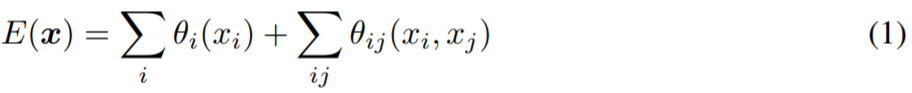

위의 식이 CRF의 수식인데, **unary term과 pairwise term으로 구성**이 되어 있다. x는 각 pixel의 위치에 해당하는 label이며, i와 j는 pixel의 위치 좌표를 나타낸다. unary term은 CNN 연산을 통해 얻이지며, 픽셀간의 detail한 예측에서 pairwise term이 중요한 역할을 한다.

http://swoh.web.engr.illinois.edu/courses/IE598/handout/fall2016_slide15.pdf

해당 링크를 참고하면 CRF에 대해 알 수 있다.

## **Experiments**

이제 간략히 실험 결과를 살펴보도록 하겠다.

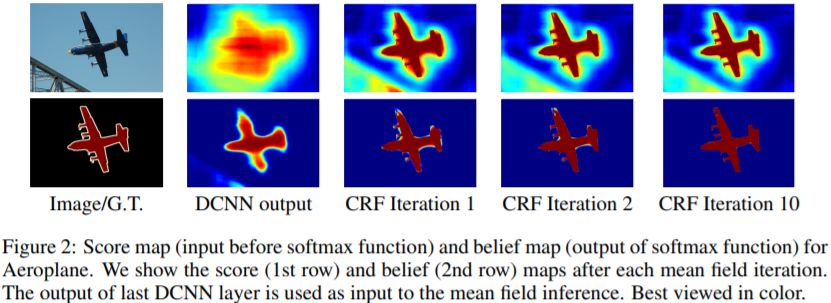

먼저, 위의 그림 Figure 2는 CRF가 얼마나 segmentation에 도움을 주는지 보여준다.

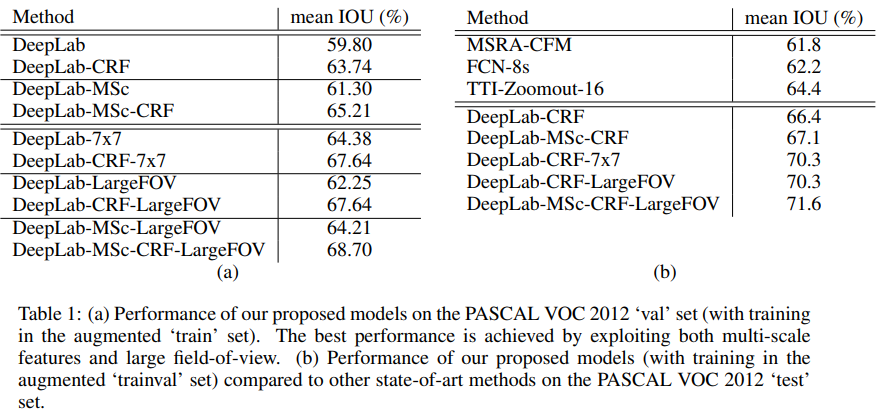

위의 표 Table 1에서는 PASCAL VOC 2012에 대한 실험 결과를 mIOU로 보여준다.

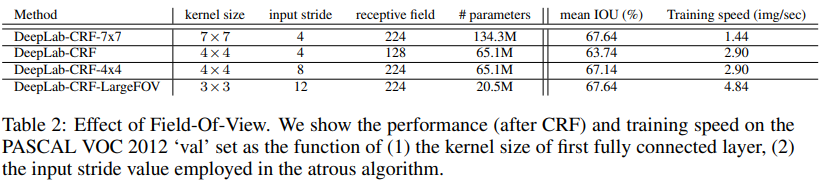

위의 표 Table 2는 각 설정마다 parameter 수와 연산 속도 및 mIOU를 보여준다.

실험 결과를 더 자세히 보고 싶으면, 본 논문을 참고하길 추천한다. 예전 논문이기 때문에 간략히 핵심만 설명하고 끝내겠다.